In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from pathlib import Path
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from utils.metrics import calculate_anomaly_metrics, format_results

In [2]:
train = pd.read_csv('../data/train.csv')

feature_cols = [
    'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21'
]

In [3]:
def get_baseline(df, pct=0.3):
    baseline_list = []
    for unit in df['unit_id'].unique():
        unit_data = df[df['unit_id'] == unit]
        cutoff = unit_data['time_cycles'].max() * pct
        baseline_list.append(unit_data[unit_data['time_cycles'] <= cutoff])
    return pd.concat(baseline_list)

baseline = get_baseline(train)
X_baseline = baseline[feature_cols].values

In [4]:
model = OneClassSVM(
    nu=0.005,        
    kernel='rbf',
    gamma='scale'
)
model.fit(X_baseline)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,nu,0.005
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [5]:
X_train = train[feature_cols].values
predictions = model.predict(X_train)
train['is_anomaly'] = (predictions == -1).astype(int)
train['anomaly_score'] = -model.decision_function(X_train)

In [6]:
metrics = calculate_anomaly_metrics(train)
metrics['method'] = 'One-Class SVM'
metrics['dataset'] = 'FD001'
format_results(metrics)

📊 One-Class SVM - FD001
Cobertura: 81.9% (204/249 unidades)
RUL promedio 1ª detección: 115.9 ciclos
Detección al 56.1% del ciclo
Detecciones tempranas (RUL>50): 163
Falsos positivos (RUL>150): 25.0%
% anomalías totales: 4.3%


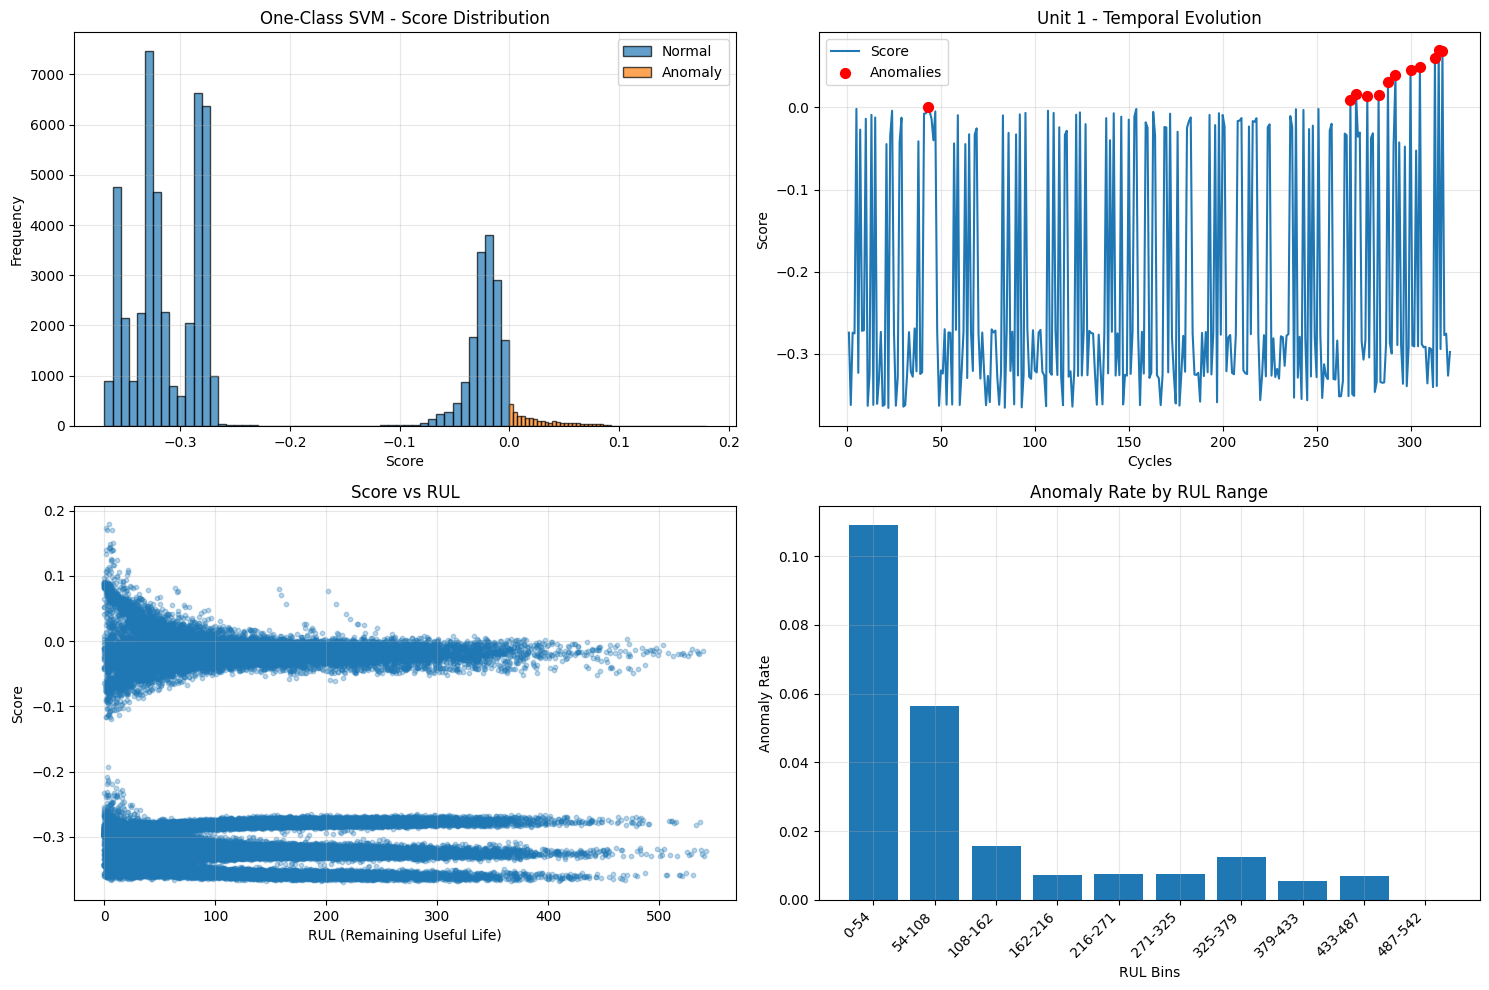

In [7]:
from utils.plots import standard_plots

standard_plots(
    train=train,
    score_col='anomaly_score',
    method_name='One-Class SVM',
    output_path='./outputs'
)